# Кто длиннее?

Правда ли, что у Л. Н. Толстого длинные предложения? Значимо ли они длиннее, чем у Чехова?

In [ ]:
# скачиваем с гитхаба таблицу, с которой будем работать (спасибо Лёше Старченко)
!wget https://github.com/tbkazakova/compling_for_lyceum/raw/main/data/tolstoj_chehov.xlsx

In [6]:
import pandas as pd

sents = pd.read_excel('tolstoj_chehov.xlsx')

In [16]:
sents

,Предложение,Дата,Автор
0,Оставайся!,1885,А. П. Чехов
1,Львов.,1887,А. П. Чехов
2,Пожалуйте!,1884,А. П. Чехов
3,Борцов.,1885,А. П. Чехов
4,Исковеркаю!,1892,А. П. Чехов
...,...,...,...
1196,Так как брошюры эти были написаны мною и издав...,1909,Л. Н. Толстой
1197,"Здесь, приехавши в Гриневку и увидав заморышей...",1894,Л. Н. Толстой
1198,Не буду говорить о тех миллионах глупостей и г...,1909,Л. Н. Толстой
1199,Сейчас у нас с России происходит нечто необыкн...,1899,Л. Н. Толстой


In [5]:
sents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Предложение  1201 non-null   object
 1   Дата         1201 non-null   object
 2   Автор        1201 non-null   object
dtypes: object(3)
memory usage: 28.3+ KB


In [4]:
sents['Автор'].unique()

array(['А. П. Чехов', 'коллективный', 'Л. Н. Толстой'], dtype=object)

In [17]:
sents['Автор'].value_counts()

А. П. Чехов      627
коллективный     383
Л. Н. Толстой    191
Name: Автор, dtype: int64

In [18]:
sents['word_len'] = sents['Предложение'].apply(lambda x: len(str(x).split()))
sents

,Предложение,Дата,Автор,word_len
0,Оставайся!,1885,А. П. Чехов,1
1,Львов.,1887,А. П. Чехов,1
2,Пожалуйте!,1884,А. П. Чехов,1
3,Борцов.,1885,А. П. Чехов,1
4,Исковеркаю!,1892,А. П. Чехов,1
...,...,...,...,...
1196,Так как брошюры эти были написаны мною и издав...,1909,Л. Н. Толстой,98
1197,"Здесь, приехавши в Гриневку и увидав заморышей...",1894,Л. Н. Толстой,99
1198,Не буду говорить о тех миллионах глупостей и г...,1909,Л. Н. Толстой,127
1199,Сейчас у нас с России происходит нечто необыкн...,1899,Л. Н. Толстой,145


<Axes: >

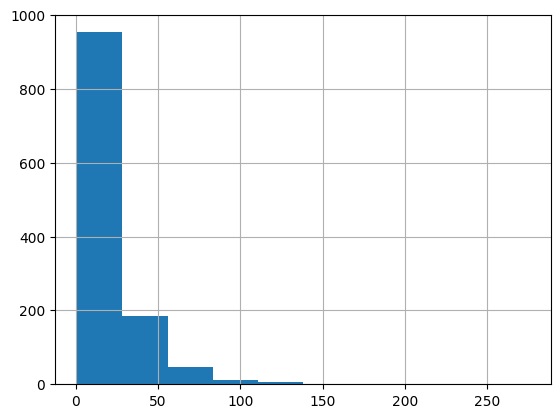

In [ ]:
sents['word_len'].hist()

In [ ]:
sents.groupby('Автор')['word_len'].mean()

Автор
А. П. Чехов      16.722488
Л. Н. Толстой    32.083770
коллективный     20.451697
Name: word_len, dtype: float64

А. П. Чехов
коллективный
Л. Н. Толстой


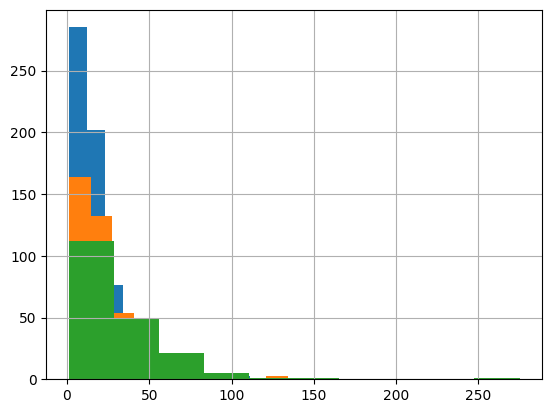

In [ ]:
for author in list(sents['Автор'].unique()):
    print(author)
    sents[sents['Автор'] == author]['word_len'].hist()

array([[<Axes: title={'center': 'А. П. Чехов'}>,
        <Axes: title={'center': 'Л. Н. Толстой'}>],
       [<Axes: title={'center': 'коллективный'}>, <Axes: >]], dtype=object)

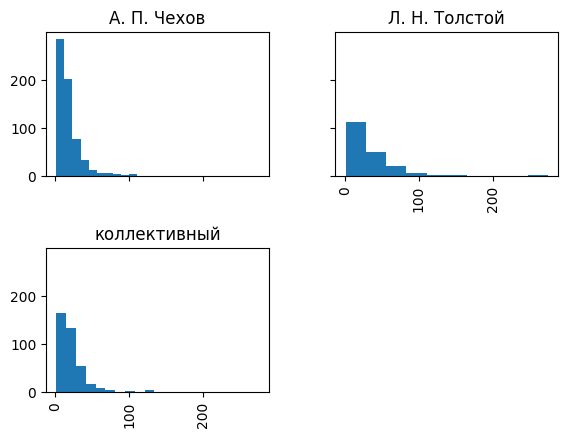

In [20]:
sents.hist('word_len', by='Автор', sharex=True, sharey=True)

**Как ответить на вопрос, случайно ли такое распределение или у Л. Н. Толстого правда предложения длиннее?**

### Существует t-test

Он же t-критерий Стьюдента.

*Историческая справка: его создал сотрудник компании Гиннес и опубликовал статью под псевдонимом Student, потому что использование подобных методов в компании являлось коммерческой тайной.*

**Одновыборочный** отвечает на вопрос, может ли наша выборка быть не из генеральной совокупности с определённым средним (на каком-то уровне значимости).

**Двувыборочный** отвечает на вопрос, могут ли две наши выборки быть не из одной генеральной совокупности (на каком-то уровне значимости), правда ли, что две выборки значимо отличаются.

#### Как работать со статистическими тестами:
- формулируем гипотезы: нулевая (H0) - что ничего не интересно, альтернативная (H1) — то, что хотим показать
- применяем математику
- математика выдаёт шанс (`p-value`), что мы отвергнем нулевую гипотезу по ошибке
- смотрим, маленький это шанс или большой
- делаем выводы



Тренируемся формулировать гипотезы. Перед вами данные о тату у пиратов. (EP - eyepatch, повязка на глаз)

![t-test](https://raw.githubusercontent.com/tbkazakova/python-datan_2023_minor/main/data/ttest.png)

In [1]:
! pip install scipy

In [2]:
import numpy as np
from scipy import stats

# У нас есть оценки
student_scores = np.array([72, 89, 65, 73, 79, 84, 63, 76, 85, 75])

# Вышка думает, что средняя оценка при 100 шкале - 70
mu = 70

#Хотим понять, у нас рандомные студенты из генеральной совокупности
# или это какие-то особенные (старательные или наоборот не старательные)

# Нулевая гипотеза:
# это рандомные студенты из генеральной совокупности, среднее незначимо отличается от того, что в генеральной совокупности

# Ненулевая гипотеза:
# у нас какие-то особенные, среднее значимо отличается от того, что в генеральной совокупности

# Используем одновыборочный t-test
t_stat, p_value = stats.ttest_1samp(student_scores, mu)
print("T statistic:", t_stat)
print("P-value:", p_value)

# Вот такой у нас уровень значимости. Это значит, что мы готовы ошибиться в 5 случаях из 100
alpha = 0.05

# Интерпретируем результат
if p_value < alpha:
    print("Отклоняем нулевую гипотезу, есть статистически значимая разница между средними выборки и генеральной совокупности.")
else:
    print("Не получается отклонить нулевую гипотезу, нет статистически значимой разницы между средними выборки и генеральной совокупности.")

T statistic: 2.2894683580127317
P-value: 0.047816221110566944
Отклоняем нулевую гипотезу, есть статистически значимая разница между средними выборки и генеральной совокупности.


**Это был одновыборочный. А нам нужен двувыборочный как сделать?**

[t-test для двух выборок](https://researchpy.readthedocs.io/en/latest/ttest_documentation.html)

In [ ]:
! pip install researchpy

In [8]:
import researchpy as rp

In [13]:
# это рост мужчин и рост женщин
samples = pd.read_csv('https://raw.githubusercontent.com/alekseyst/text_analysis_2023/main/Seminar_7/sample_ttest.csv')
samples.head()

,sample_one,sample_two
0,174,182
1,171,171
2,195,162
3,162,175
4,179,142


In [12]:
rp.ttest(samples['sample_one'], samples['sample_two'], equal_variances = False, paired = False)

/usr/local/lib/python3.10/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(     Variable     N        Mean         SD        SE   95% Conf.    Interval
 0  sample_one  21.0  174.428571  11.382317  2.483825  169.247403  179.609740
 1  sample_two  21.0  165.047619   9.957290  2.172859  160.515115  169.580123
 2    combined  42.0  169.738095  11.580175  1.786860  166.129459  173.346732,
                       Satterthwaite t-test  results
 0  Difference (sample_one - sample_two) =    9.3810
 1                    Degrees of freedom =   39.3051
 2                                     t =    2.8426
 3                 Two side test p value =    0.0071
 4                Difference < 0 p value =    0.9965
 5                Difference > 0 p value =    0.0035
 6                             Cohen's d =    0.8773
 7                             Hedge's g =    0.8607
 8                        Glass's delta1 =    0.8242
 9                      Point-Biserial r =    0.4129)

Какой можно сделать вывод?

Что значат параметры `equal_variances` и `paired`?
- `equal_variances`=False для случаев, когда дисперсии выборок неодинаковые
- `paired`=True, если у вас выборки зависят друг от друга (например, это показатели одних и тех же людей до и после операции), в остальных случаях `paired`=False

**Но у нас Чехов и Толстой.**

In [ ]:
chehov = sents[sents['Автор'] == 'А. П. Чехов']['word_len'].values
tolstoj = sents[sents['Автор'] == 'Л. Н. Толстой']['word_len'].values
tolstoj

array([  1,   1,   2,   2,   2,   2,   3,   3,   4,   4,   5,   6,   7,
         7,   7,   8,   8,   8,   8,   8,   9,   9,   9,   9,  10,  10,
        10,  10,  11,  11,  11,  11,  11,  11,  12,  12,  12,  12,  13,
        13,  13,  14,  14,  14,  14,  15,  15,  15,  15,  16,  16,  16,
        16,  16,  16,  17,  17,  17,  17,  17,  17,  18,  18,  18,  19,
        19,  19,  19,  20,  20,  20,  20,  20,  20,  20,  20,  21,  21,
        21,  21,  21,  21,  21,  22,  22,  22,  23,  23,  23,  23,  23,
        23,  24,  24,  24,  24,  25,  25,  26,  26,  26,  26,  27,  27,
        27,  27,  28,  28,  28,  28,  28,  28,  29,  29,  29,  29,  30,
        30,  30,  30,  30,  31,  31,  31,  31,  31,  31,  32,  32,  32,
        34,  35,  35,  35,  35,  37,  37,  38,  38,  38,  38,  39,  40,
        40,  41,  41,  43,  43,  43,  46,  46,  48,  49,  49,  50,  50,
        50,  51,  53,  53,  55,  55,  56,  56,  57,  58,  58,  58,  59,
        63,  63,  66,  67,  67,  68,  70,  70,  72,  73,  73,  7

Если бы данные были бы распределены нормально, мы бы использовали t-test для двух выборок.

Но t-test придуман для выборок с нормальным распределением.

Будем использовать аналог t-теста, которому неважно, какое распределение.

### Тест Манна-Уитни

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
res = mannwhitneyu(tolstoj, chehov, alternative="greater")
print(res)

MannwhitneyuResult(statistic=86704.0, pvalue=3.076490071036075e-21)


**Какой вывод?**

p-value маленькое, сильно меньше порога. Мы можем смело отвергать нулевую гипотезу о том, что между Толстым и Чеховым нет статистически значимой разницы. И принимать гипотезу о том, что предложения у Толстого длиннее, чем у Чехова.

**Что значит одно- или двусторонний тест?**

![Что значит одно- или двусторонний тест?](https://raw.githubusercontent.com/tbkazakova/python-datan_2023_minor/main/data/one_vs_two_sided.png)